In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Resources'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
data = pd.read_csv("Resources/data.csv")

In [3]:
y= data['diagnosis'].map({'M':0,'B':1})

In [4]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [5]:
#x= data.drop(columns=['id','diagnosis','Unnamed: 32'])
x = data[['radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 
       'radius_worst', 'texture_worst',
       'perimeter_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst']]

#x= data.drop(columns=['id','diagnosis','Unnamed: 32'])
x1 = data[['radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 
       'radius_worst', 'texture_worst',
       'perimeter_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst']]



In [6]:
import tensorflow as tf

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
#Applying train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.33,random_state=1)
N ,D =X_train.shape

In [9]:
# Scalling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [10]:
### Now creating the model

model = tf.keras.models.Sequential([tf.keras.layers.Input(shape=(D,)),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
])


In [11]:
# Compiling the model

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [12]:
#You can avoid this error by converting your labels to arrays before calling model.fit()
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)
X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)

In [13]:
r= model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100)

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 1s 3ms/sample - loss: 0.8111 - accuracy: 0.4567 - val_loss: 0.7617 - val_accuracy: 0.5213
Epoch 2/100
381/381 [==============================] - 0s 181us/sample - loss: 0.7514 - accuracy: 0.5171 - val_loss: 0.7090 - val_accuracy: 0.5798
Epoch 3/100
381/381 [==============================] - 0s 174us/sample - loss: 0.6966 - accuracy: 0.5801 - val_loss: 0.6620 - val_accuracy: 0.6649
Epoch 4/100
381/381 [==============================] - 0s 186us/sample - loss: 0.6478 - accuracy: 0.6325 - val_loss: 0.6203 - val_accuracy: 0.6809
Epoch 5/100
381/381 [==============================] - 0s 190us/sample - loss: 0.6054 - accuracy: 0.6903 - val_loss: 0.5832 - val_accuracy: 0.7074
Epoch 6/100
381/381 [==============================] - 0s 172us/sample - loss: 0.5671 - accuracy: 0.7244 - val_loss: 0.5510 - val_accuracy: 0.7287
Epoch 7/100
381/381 [==============================] - 0s 171us/sample - l

381/381 [==============================] - 0s 174us/sample - loss: 0.1838 - accuracy: 0.9318 - val_loss: 0.1986 - val_accuracy: 0.9468
Epoch 57/100
381/381 [==============================] - 0s 166us/sample - loss: 0.1821 - accuracy: 0.9318 - val_loss: 0.1970 - val_accuracy: 0.9468
Epoch 58/100
381/381 [==============================] - 0s 178us/sample - loss: 0.1806 - accuracy: 0.9318 - val_loss: 0.1954 - val_accuracy: 0.9468
Epoch 59/100
381/381 [==============================] - 0s 176us/sample - loss: 0.1791 - accuracy: 0.9344 - val_loss: 0.1938 - val_accuracy: 0.9521
Epoch 60/100
381/381 [==============================] - 0s 160us/sample - loss: 0.1775 - accuracy: 0.9370 - val_loss: 0.1922 - val_accuracy: 0.9521
Epoch 61/100
381/381 [==============================] - 0s 179us/sample - loss: 0.1761 - accuracy: 0.9370 - val_loss: 0.1907 - val_accuracy: 0.9521
Epoch 62/100
381/381 [==============================] - 0s 216us/sample - loss: 0.1747 - accuracy: 0.9370 - val_loss: 0.1891 

In [14]:
# train and test score
print("Train score",model.evaluate(X_train,Y_train))
print("Test score",model.evaluate(X_test,Y_test))

381/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train score [0.13666614233039495, 0.9448819]
188/1 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

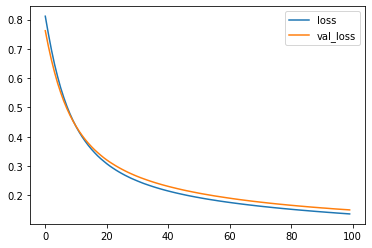

In [15]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [16]:
x=scaler.fit_transform(x)
cl = pd.DataFrame(model.predict_classes(x),columns=['class'])

In [17]:
data['class']=cl

In [18]:
pd.DataFrame([data['id'],data['class']]).T.to_csv('Submit.csv',index=False)

In [19]:
#Trying Random Forest Classification
#See https://www.datacamp.com/community/tutorials/random-forests-classifier-python

In [20]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)

y_pred=clf.predict(X_test)

In [21]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9095744680851063


Feature: 0, Score: 0.01618
Feature: 1, Score: 0.08907
Feature: 2, Score: 0.04299
Feature: 3, Score: 0.00739
Feature: 4, Score: 0.04943
Feature: 5, Score: 0.07701
Feature: 6, Score: 0.01732
Feature: 7, Score: 0.00485
Feature: 8, Score: 0.03145
Feature: 9, Score: 0.20281
Feature: 10, Score: 0.02609
Feature: 11, Score: 0.16772
Feature: 12, Score: 0.01545
Feature: 13, Score: 0.01136
Feature: 14, Score: 0.03471
Feature: 15, Score: 0.20616


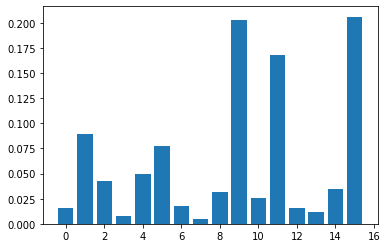

In [22]:
from sklearn.datasets import make_classification
from matplotlib import pyplot


# get importance
importance = clf.feature_importances_


list = x1.columns
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
#pyplot.bar([x for x in range(len(importance))],importance)

In [23]:
list

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se',
       'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')